# Проект "Приоритизация гипотез и анализ А/В-теста"

### Краткое описание проекта
Аналитик крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
С помощью фремворков гипотезы были приоритизированы и была выбрана самая приритетная гипотеза. Для проверки этой гипотезы был разработан и проведен А/В-тест. Далее результаты А/В-теста были проанализированы и принято решение о прекращении А/В-теста.

### Цель проекта
Проверить с помощью А/В-теста одну из гипотез по увеличению выручки интернет-магазина и принять решение о продолжении либо прекращении А/B-теста.

## Часть 1. Приоритизация гипотез

### Описание данных первой части проекта

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### План работы по первой части проекта
- С помощью фреймворка ICE приоритизировать гипотезы по убыванию приоритета.
- С помощью фреймворка RICE приоритизировать гипотезы по убыванию приоритета.
- Объяснить изменения в приоритизации гипотез.

## Часть 2. Анализ A/B-теста

### Описание данных для второй части
**Датасет "orders":**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Датасет "visitors":**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### План работы по  второй части проекта 

 * Построить графики кумулятивной выручки и кумулятивного среднего чека по группам  
 - Построить график относительного изменения кумулятивного среднего чека группы B к группе A  
 * Построить график кумулятивного среднего количества заказов на покупателя по группам
 - Построить график относительного изменения кумулятивного среднего количества заказов на покупателя группы B к группе A
 * Построить точечный график количества заказов по покупателям
 - Посчитать 95-й и 99-й перцентили количества заказов на покупателя. Выбрать границу для определения аномальных пользователей
 * Построить точечный график стоимостей заказов
 - Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов
 * Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
 - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
 * Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
 - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
 * Принять решение по результатам теста и объяснить его

## Часть 1. Приоритизация гипотез

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from skimpy import clean_columns
from skimpy import skim

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# устанавливаем ширину столбца
pd.options.display.max_colwidth = 130

In [4]:
# загрузим данные
try:
    hypothesis = pd.read_csv('...csv') 
except:
    hypothesis = pd.read_csv('https://....csv')
    
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
# получим общую информацию о данных
skim(hypothesis)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9      │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Reach              │    0 │       0 │     4.8 │    3.2 │    1 │     3 │     3 │     8 │      10 │  ▅▇▃ ▅▃  │  │
│ │ Impact             │    0 │       0 │     4.8 │    3.2 │    1 │     3 │     3 │     7 │      10 │  ▅▇▃ ▃▅  │  │
│ │ Confidence         │    0 │       0 │     5.6 │      3 │    1 │     3 │     7 │     8 │       9 │  ▅▂▂ ▂▇  │  │
│ │ Efforts            │    0 │       0 │     4.9 │    2.8 │    1 │     3 │     5 │     6 │      10 │  ▃▇▅▃▃▃  │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Hypothesis                │       0 │          0 │                           12 │                      104 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
# изменим заглавные буквы на строчные в наименовании столбцов
hypothesis = clean_columns(hypothesis, case='snake', replace=None, remove_accents=True)

In [7]:
# приоритизируем гипотезы с помощью фреймворка ICE
hypothesis['ICE'] = round(
                         (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2
                         )

hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [8]:
# приоритизируем гипотезы с помощью фреймворка RICE
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']  

hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Выводы
Приоритет гипотез по фреймворкам ICE и RICE различается. Это связано с тем, что RICE учитывает охват пользователей, а ICE - нет. Соответственно RICE больше приоритезирует гипотезы с большим охватом, так по ICE гиптеза **Запустить акцию, дающую скидку на товар в день рождения** была на 1-м месте, а по RICE она оказалась на 5-м месте.

## Часть 2. Анализ A/B-теста

### Загрузка и предобработка данных

In [9]:
# загрузим данные
try:
    orders = pd.read_csv('....csv', parse_dates=['date']) 
except:
    orders = pd.read_csv('....csv', parse_dates=['date'])
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
# загрузим данные
try:
    visitors = pd.read_csv('visitors.csv', parse_dates=['date']) 
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', parse_dates=['date'])
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
# изменим написание наименований столбцов на "змеиный" стиль
# orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

orders = clean_columns(orders, case='snake', replace=None, remove_accents=True)

In [12]:
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [13]:
# получим общую информацию о данных
skim(orders)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1197   │ │ int32       │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ transact │  0 │    0 │ 14000000 │ 13000000 │ -2100000 │ -1100000 │  4900000 │ 12000000 │ 21000000 │ ▇▇▇▇▇▇ │  │
│ │ ion_id   │    │      │          │       00 │      000 │      000 │          │       00 │       00 │        │  │
│ │ visitor_ │  0 │    0 │ -3400000 │ 13000000 │ -2100000 │ -1200000 │ -3900000 │ 10000000 │ 21000000 │ ▇▇▇▇▇▇ │  │
│ │ id       │    │      │        0 │       00 │      000 │      000 │        0 │       00 │       00 │        │  │
│ │ revenue  │  0 │    0 │     8300 │    39000 │       50 │     1200 │     3000 │     8300 │  1300000 │   ▇    │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2019-08-01      │     2019-08-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ group                     │       0 │          0 │                            1 │                     1197 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [14]:
# получим общую информацию о данных
skim(visitors)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 62     │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 3      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ visitors          │    0 │       0 │     610 │    110 │   360 │   530 │   620 │   710 │     770 │  ▃▂▃▅▅▇  │  │
│ └───────────────────┴──────┴─────────┴─────────┴────────┴───────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2019-08-01      │     2019-08-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ group                     │       0 │          0 │                            1 │                       62 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [15]:
# проверим наличие явных дубликатов
orders.duplicated().sum()

0

In [16]:
# проверим наличие явных дубликатов
visitors.duplicated().sum()

0

#### Выводы
Данные полные, типы данных соответствуют данным, явных дубликатов нет.

In [17]:
# проверим данные на уникальность
orders['transaction_id'].nunique() 

1197

Данные в столбце 'transaction_id' уникальны.

In [18]:
# проверим данные на уникальность
orders['visitor_id'].nunique() 

1031

Количество пользователей меньше, чем количество заказов. Что означает, что часть пользователей сделала более 1-го заказа.

In [19]:
# посмотрим на временной промежуток, который охватывают данные
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [20]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

А/В-тест проводился в августе 2019 года весь месяц

In [21]:
# посмотрим на описательную статистику столбца 'revenue'
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

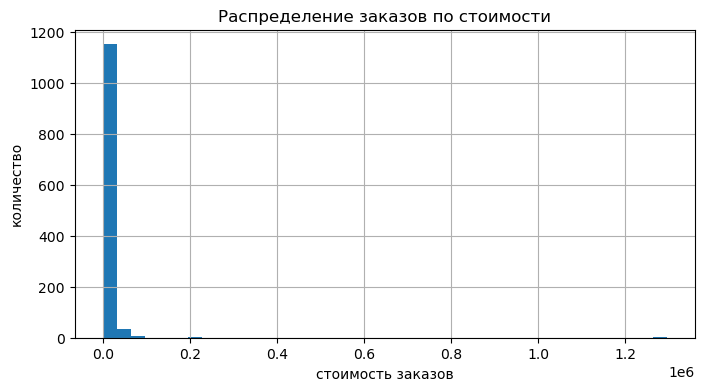

In [22]:
# по описательной статистике мы видим аномалии. Построим гистограммы, чтобы посмотреть на распределение данных
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(title = 'Распределение заказов по стоимости', xlabel = 'стоимость заказов', ylabel = 'количество')
orders['revenue'].hist(bins=40);

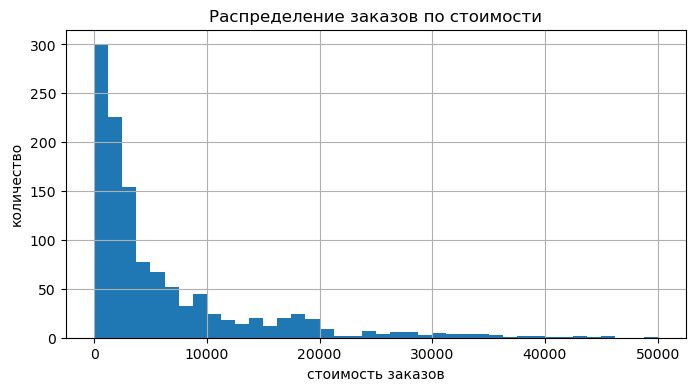

In [23]:
# посмотрим на интервал от 0 до 50000
fig, ax = plt.subplots(figsize=(8, 4))
ax.set(title = 'Распределение заказов по стоимости', xlabel = 'стоимость заказов', ylabel = 'количество')
orders['revenue'].hist(bins=40, range=(0, 50000));

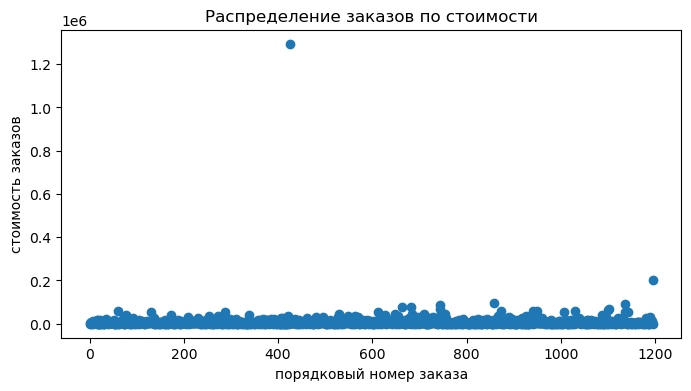

In [24]:
# построим точечный график распределения заказов по стоимости
x_values = pd.Series(range(0,len(orders['revenue'])))
fig, ax = plt.subplots(figsize=(8, 4))
plt.scatter(x_values, orders['revenue'])
ax.set(title = 'Распределение заказов по стоимости', xlabel = 'порядковый номер заказа', ylabel = 'стоимость заказов');

#### Выводы:
1. По характеру распределение заказов по стоимости ближе к распределению Пуассона.
2. 75% заказов не превышают 8290 рублей. При этом есть длинный правый "хвост" вплоть до 50000 рублей.
3. Видны явные выбросы в районе 200 тыс. рублей и более 1,2 млн. рублей.

In [25]:
# проверим, попали ли какие-то пользователи одновременно в группу А и Б
len(set(orders.query('group == "A"')['visitor_id']).intersection(orders.query('group == "B"')['visitor_id']))

58

Да, попали. Таких пользователей 58.

In [26]:
# проверим сколько заказов связано с этими пользователями
users_A_and_B = list(set(orders.query('group == "A"')['visitor_id'])
                     .intersection(orders.query('group == "B"')['visitor_id']))

orders[orders['visitor_id'].isin(users_A_and_B)].sort_values(by=['visitor_id', 'date'])

,transaction_id,visitor_id,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
246,437656952,199603092,2019-08-02,3488,B
1102,1941707234,199603092,2019-08-12,6438,A
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B
662,1811671147,4266935830,2019-08-29,78990,A


Таких записей 181, что составляет более 15% данных. Так как мы не знаем условия А/В-теста (возможно, что для этого конкретного теста это совершенно нормально), то мы не будем удалять пользователей, которые попали одновременно в группу А и В.

In [27]:
# посмотрим на распределение заказов по группам
orders['group'].value_counts()

group
B    640
A    557
Name: count, dtype: int64

Заказы по группам распределены не очень равномерно - 53,47% на 46,53%. Заказы - это уже вторичное действие (после визита), а ключевым для корректного А/В-теста является распределение визитов по группам.

Проанализируем таблицу с визитами.

In [28]:
# помотрим на временной промежуток
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [29]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

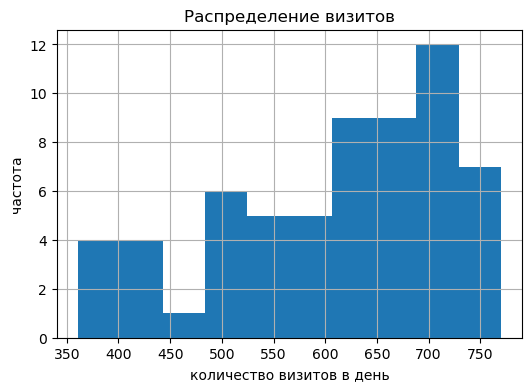

In [30]:
# потроим гистограмму распределения количества визитов в день
fig, ax = plt.subplots(figsize=(6, 4))
ax.set(title = 'Распределение визитов', xlabel = 'количество визитов в день', ylabel = 'частота')
visitors['visitors'].hist(bins=10);

Характер распределения визитов ближе к распределению Пуассона.

In [31]:
# получим описательную статистику
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

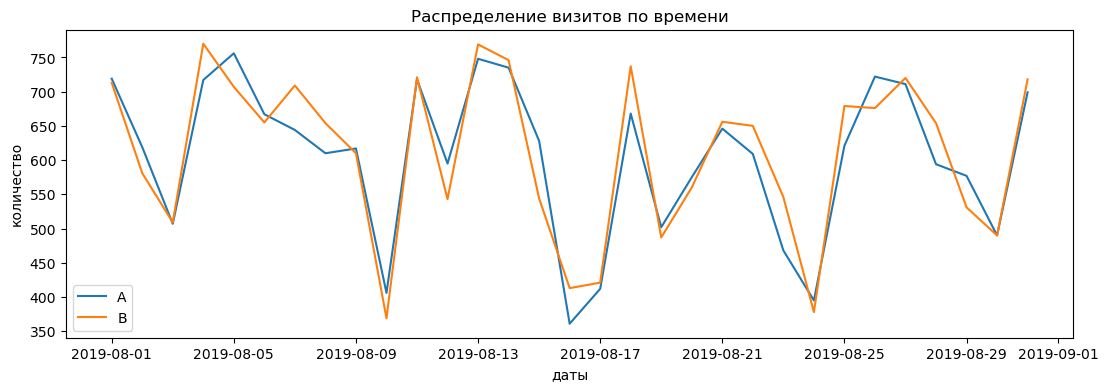

In [32]:
# построим распределение количества визитов по дням месяца и по группам
fig, ax = plt.subplots(figsize=(13, 4))
ax.set(title = 'Распределение визитов по времени', xlabel = 'даты', ylabel = 'количество')
plt.plot(visitors.query('group == "A"')['date'], visitors.query('group == "A"')['visitors'], label='A')
plt.plot(visitors.query('group == "B"')['date'], visitors.query('group == "B"')['visitors'], label='B')
plt.legend();

Видна недельная цикличность, связанная с выходными днями.

In [33]:
# найдем размеры групп
visitors.query('group == "A"')['visitors'].sum()

18736

In [34]:
visitors.query('group == "B"')['visitors'].sum()

18916

In [35]:
# найдем относительную разницу в размерах групп
(visitors.query('group == "A"')['visitors'].sum() - visitors.query('group == "B"')['visitors'].sum()
) / visitors['visitors'].sum() * 100

-0.4780622543291193

Разница между количеством визитов по группам составляет менее 0,5%. Это важно для того, чтобы тест был корректным. Можно считать, что группы практически одинаковые по размеру. Можно приступать к анализу А/В-теста.

## Анализ A/B-теста

### График кумулятивной выручки по группам

In [36]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [37]:
# получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]
.agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), 
                                     axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [38]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                     visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 
                     'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [39]:
# объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [40]:
# проверим что максимальная и минимальная даты созданного датафрейма совпадают с соответсвующими датами в исходных данных
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [41]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

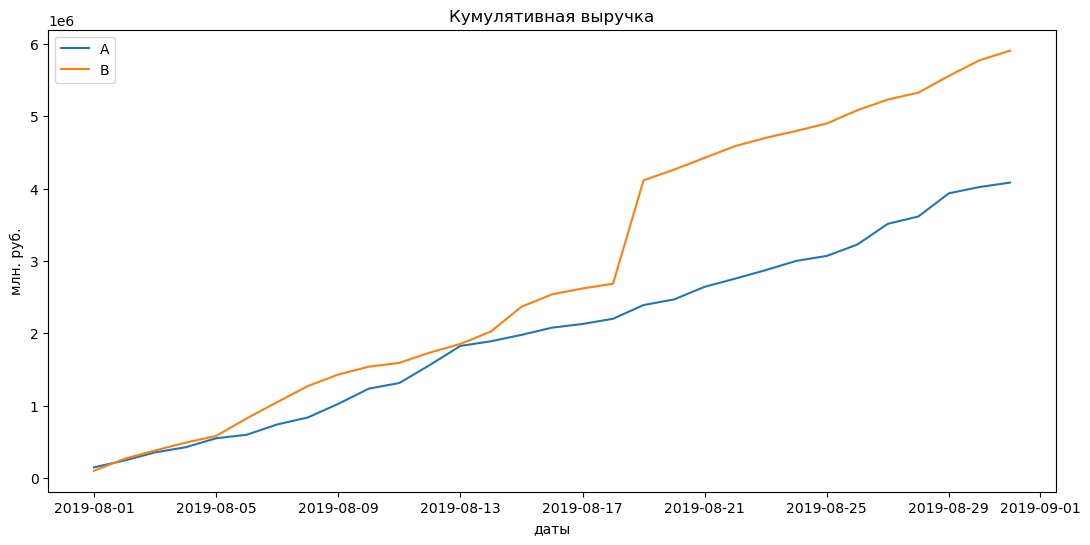

In [42]:
# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

# зададим размеры графика
fig, ax = plt.subplots(figsize=(13, 6))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

ax.set(title = 'Кумулятивная выручка', xlabel = 'даты', ylabel = 'млн. руб.')

plt.legend();

Мы видим, что кумулятивная выручка в группе В растет несколько быстрее, затем (после 17- 18 числа) кумулятивная выручка в группе В резко увеличивается, это явно из-за аномального дорогого заказа (который мы наблюдали на точечном графике). 

### Графики среднего чека по кумулятивным данным по группам 

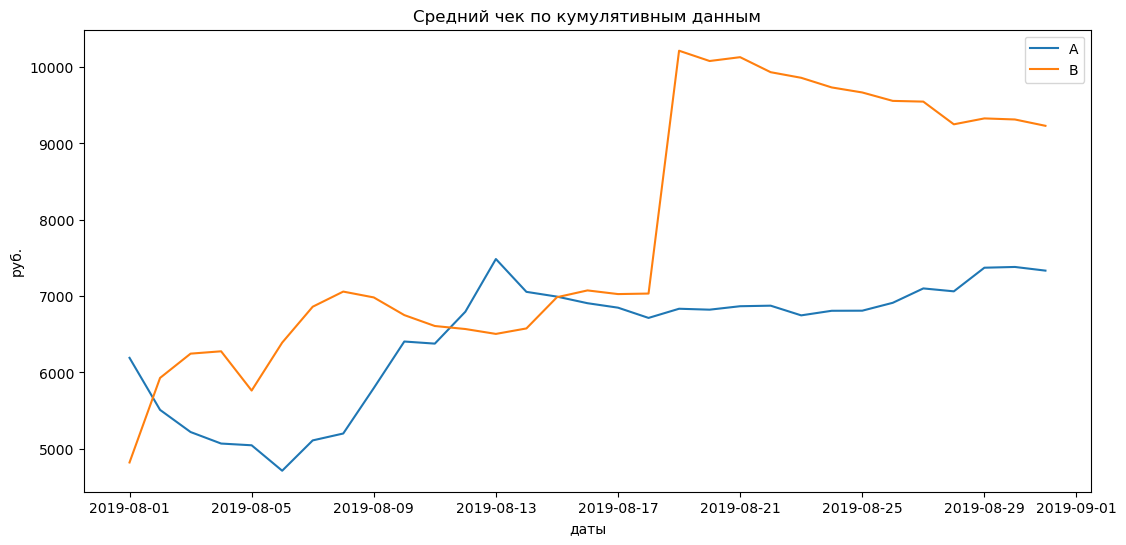

In [43]:
# Графики среднего чека по группам 
fig, ax = plt.subplots(figsize=(13, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

ax.set(title = 'Средний чек по кумулятивным данным', xlabel = 'даты', ylabel = 'руб.')

plt.legend();

Средний чек по группе А наверное близок к  стабилизации в районе 7300 руб. Средний чек по группе В существенно выше, чем по А (за счет выброса), соответственно средний чек по группе В продолжает снижаться после выброса. Для более коректного анализа нужно удалить выбросы.

### График относительного изменения кумулятивного среднего чека группы B к группе A

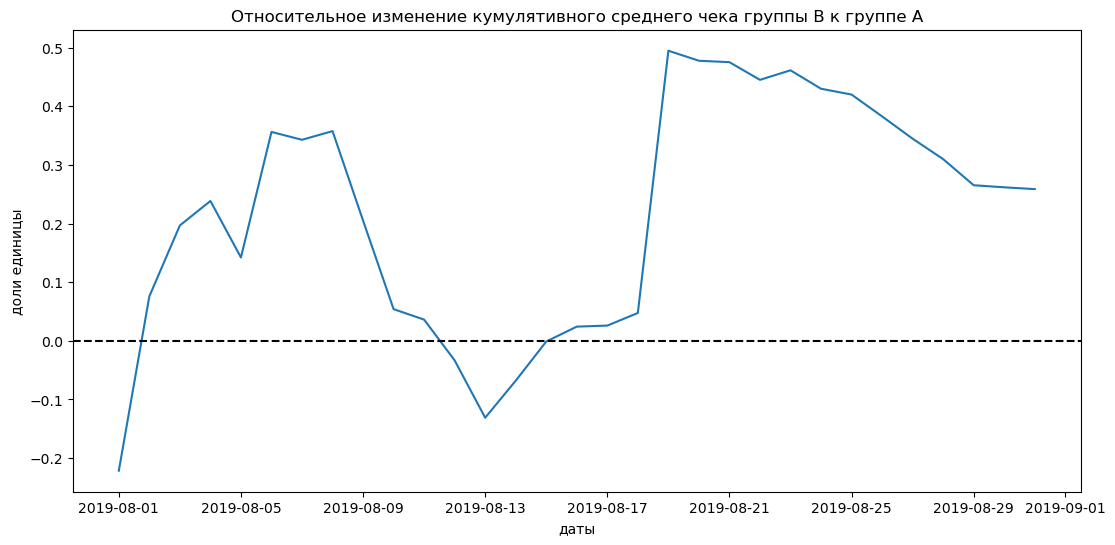

In [44]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])
# зададим размеры графика
fig, ax = plt.subplots(figsize=(13, 6))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
                                          )/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# даем названия графика и осей
ax.set(title = 'Относительное изменение кумулятивного среднего чека группы B к группе A', xlabel = 'даты', ylabel = 'доли единицы')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

На графике относительного изменения кумулятивного среднего чека группы B к группе A мы также видим сильное влияние выброса. Соответственно по такому графику пока нельзя определить тенденцию. Кумулятивный средний чек группы В в какое-то время теста превышал чек группы А примерно на 50%, а в конце теста превышение составило около 30%. 

### График кумулятивного среднего количества заказов на посетителя по группам

In [45]:
# получим таблицу с кумулятивным количеством визитов в группе А
cumulative_visitors_A = visitors.query('group=="A"')
cumulative_visitors_A = cumulative_visitors_A.copy()
cumulative_visitors_A['visitors_cum'] = cumulative_visitors_A['visitors'].cumsum()
cumulative_visitors_A.head()

,date,group,visitors,visitors_cum
0,2019-08-01,A,719,719
1,2019-08-02,A,619,1338
2,2019-08-03,A,507,1845
3,2019-08-04,A,717,2562
4,2019-08-05,A,756,3318


In [46]:
# получим таблицу с кумулятивным количеством визитов в группе В
cumulative_visitors_B = visitors.query('group=="B"')
cumulative_visitors_B = cumulative_visitors_B.copy()
cumulative_visitors_B['visitors_cum'] = cumulative_visitors_B['visitors'].cumsum()
cumulative_visitors_B.head()

,date,group,visitors,visitors_cum
31,2019-08-01,B,713,713
32,2019-08-02,B,581,1294
33,2019-08-03,B,509,1803
34,2019-08-04,B,770,2573
35,2019-08-05,B,707,3280


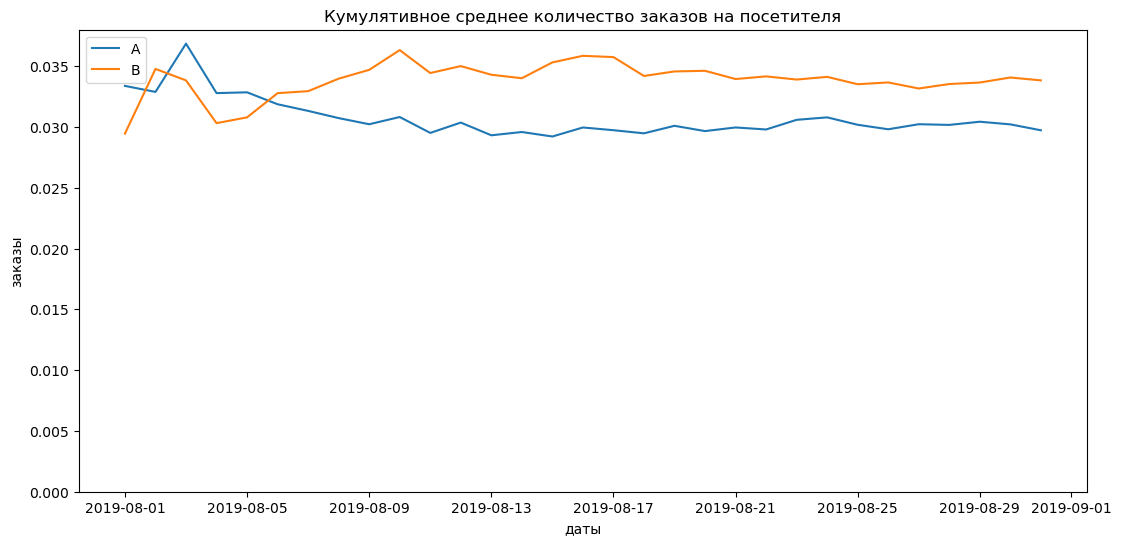

In [47]:
# датафрейм с кумулятивным количеством заказов по дням в группе А
cumulativeOrdersA = cumulativeData[cumulativeData['group']=='A'][['date', 'orders', 'buyers']]

# датафрейм с кумулятивным количеством заказов и кумулятивным количеством посетителей по дням в группе А
cumulative_A = cumulative_visitors_A.merge(cumulativeOrdersA)

# датафрейм с кумулятивным количеством заказов по дням в группе B
cumulativeOrdersB = cumulativeData[cumulativeData['group']=='B'][['date','orders', 'buyers']]

# датафрейм с кумулятивным количеством заказов и кумулятивным количеством посетителей по дням в группе В
cumulative_B = cumulative_visitors_B.merge(cumulativeOrdersB)

# зададим размеры графика
fig, ax = plt.subplots(figsize=(13, 6))

# зададим размеры оси y
plt.ylim(0, 0.038)

# даем названия графика и осей
ax.set(title = 'Кумулятивное среднее количество заказов на посетителя', xlabel = 'даты', ylabel = 'заказы')

# Строим график выручки группы А
plt.plot(cumulativeOrdersA['date'], cumulative_A['orders'] / cumulative_A['visitors_cum'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeOrdersB['date'], cumulative_B['orders'] / cumulative_B['visitors_cum'], label='B')

plt.legend();

Кумулятивное среднее количество заказов на посетителя довольно быстро вышло на стабильный уровень. Кумулятивное среднее количество заказов на посетителя в группе В стабильно выше, чем в группе А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [48]:
# собираем кумулятивные данные в одном датафрейме
merged_cumulative = cumulative_A.merge(cumulative_B, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

merged_cumulative.head()

,date,groupA,visitorsA,visitors_cumA,ordersA,buyersA,groupB,visitorsB,visitors_cumB,ordersB,buyersB
0,2019-08-01,A,719,719,24,20,B,713,713,21,20
1,2019-08-02,A,619,1338,44,38,B,581,1294,45,43
2,2019-08-03,A,507,1845,68,62,B,509,1803,61,59
3,2019-08-04,A,717,2562,84,77,B,770,2573,78,75
4,2019-08-05,A,756,3318,109,100,B,707,3280,101,98


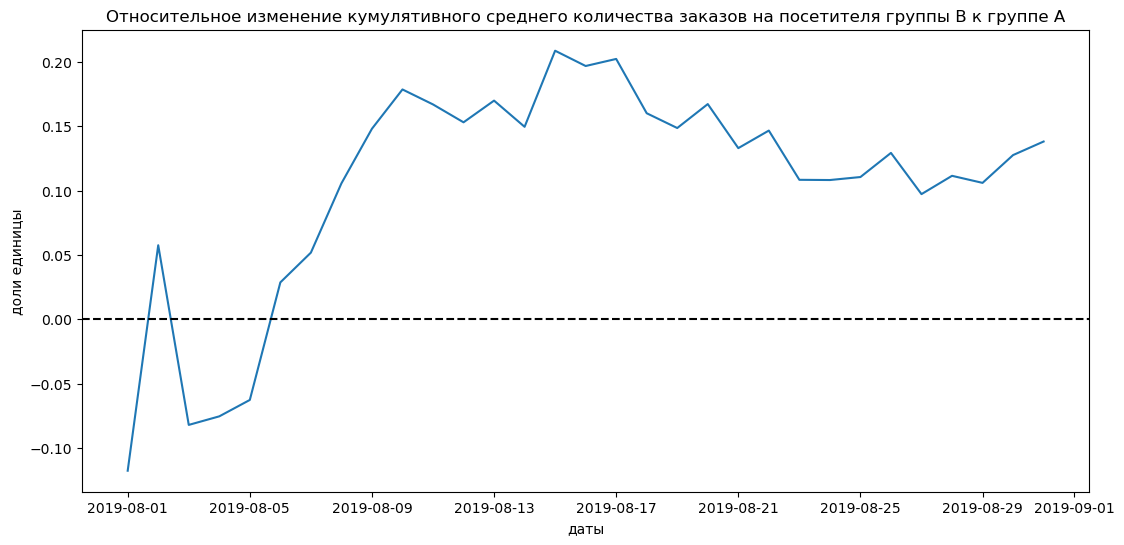

In [49]:
# зададим размеры графика
fig, ax = plt.subplots(figsize=(13, 6))

# cтроим отношение кумулятивного среднего количества заказов на покупателя группы B к группе A
plt.plot(merged_cumulative['date'], (merged_cumulative['ordersB']/merged_cumulative['visitors_cumB']                                                                               
                                         )/(merged_cumulative['ordersA']/merged_cumulative['visitors_cumA'])-1)
# даем названия графика и осей
ax.set(title = 'Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A', 
       xlabel = 'даты', ylabel = 'доли единицы')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A достаточно быстро вышло в положительную зону и стабильно показывает более высокую конверсию в группе В.

### Точечный график количества заказов по покупателям

In [50]:
# найдём количество заказов на покупателя
orders_by_user = orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).reset_index()
orders_by_user.head()

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


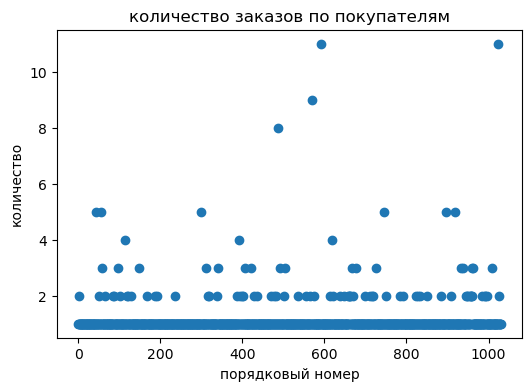

In [51]:
# построим точечный график количества заказов по покупателям
x_values = pd.Series(range(0,len(orders_by_user['visitor_id'])))

# зададим размеры графика
fig, ax = plt.subplots(figsize=(6, 4))

# даем названия графика и осей
ax.set(title = 'количество заказов по покупателям', 
       xlabel = 'порядковый номер', ylabel = 'количество')

# строим график
plt.scatter(x_values, orders_by_user['transaction_id']) ;

В основном покупатели делают 1 заказ, значительно реже - 2, более трех заказов делают единицы. Визуально 4 и более заказа можно считать выбросами.

### Расчет 95-й и 99-й перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [52]:
np.percentile(orders_by_user['transaction_id'], [95, 99])

array([2., 4.])

Не более 5% пользователей делали более 2 заказов, и не более 1% пользователей делали более 4 заказов. Можно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

### Точечный график стоимостей заказов

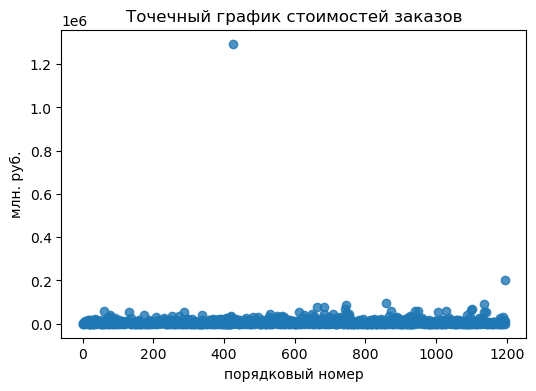

In [53]:
# получим данные для оси Х
x_values = pd.Series(range(0,len(orders['transaction_id'])))

# зададим размеры графика
fig, ax = plt.subplots(figsize=(6, 4))

# задаем названия графика и осей
ax.set(title = 'Точечный график стоимостей заказов', xlabel = 'порядковый номер', ylabel = 'млн. руб.')

# строим график
plt.scatter(x_values, orders['revenue'], alpha=0.8);

На точечном графике стоимостей заказов видны два явных выброса: в районе 200 тыс. руб. и более 1,2 млн. руб. 

### Расчет 95-й и 99-й перцентиля стоимости заказов. Выбор границы для определения аномальных заказов

In [54]:
# Расчитаем 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

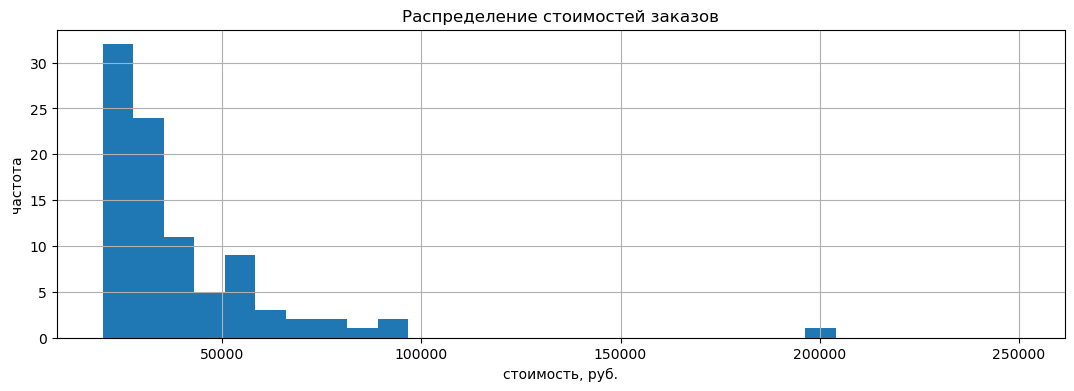

In [55]:
# ещё раз посмотрим на гистограмму, чтобы оценить гранцу анамальной стоимости заказов

# зададим размеры графика
fig, ax = plt.subplots(figsize=(13, 4))

# задаем названия графика и осей
ax.set(title = 'Распределение стоимостей заказов', xlabel = 'стоимость, руб.', ylabel = 'частота')

orders['revenue'].hist(bins=30, range=(20000, 250000));

Не более 5% заказов выше 28 000 руб., и не более 1% заказов выше 58 233,2 руб. Можно выбрать стоимость заказа между 100 000 руб.  и 180 000 за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. Визуально по точечному графику стоимостей заказов видны два явных выброса: в районе 200 тыс. руб. и более 1,2 млн. руб. Есть смысл именно их и удалить.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [56]:
# посчитаем количество заказов на пользователя по группам
orders_by_users_A = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_A.columns = ['user_id', 'orders'] # изменим названия столбцов

orders_by_users_B = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_B.columns = ['user_id', 'orders'] # изменим названия столбцов

In [57]:
orders_by_users_A.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [58]:
orders_by_users_B.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [59]:
# Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать 
# число заказов пользователя. А пользователям без заказов — нули. 
sampleA = pd.concat([orders_by_users_A['orders'], pd.Series(0, index=np.arange(visitors.query('group == "A"')['visitors'].sum() - 
           len(orders_by_users_A['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_users_B['orders'], pd.Series(0, index=np.arange(visitors.query('group == "B"')['visitors'].sum() - 
           len(orders_by_users_B['orders'])), name='orders')],axis=0)

In [60]:
# посмотрим как распределяются посетители по количеству заказов
sampleA.value_counts()

orders
0    18233
1      473
2       17
3        7
4        3
5        2
7        1
Name: count, dtype: int64

In [61]:
# среднее число заказов на 1 посетителя в группе А
sampleA.mean()

0.029728864218616567

In [62]:
# посмотрим как распределяются посетители по количеству заказов
sampleB.value_counts()

orders
0    18330
1      552
2       23
3        5
4        4
5        1
6        1
Name: count, dtype: int64

In [63]:
# среднее число заказов на 1 посетителя в группе В
sampleB.mean()

0.033833791499259885

**Нулевая гипотеза** - среднее количество заказов на посетителя в группах А и В равны

**Альтернативная гипотеза** - среднее количество заказов на посетителя в группах А и В не равны

In [64]:
# проверка статистической значимости различий в среднем количестве заказов на посетителя 
# между группами по «сырым» данным с помощью теста Манна-Уитни
display('P-value  = ' "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

'P-value  = 0.01679'

P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия.

In [65]:
# прирост среднего количества заказов группы B к группе A
display('Прирост среднего количества заказов группы B к группе A = '"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'Прирост среднего количества заказов группы B к группе A = 0.138'

 Относительный прирост среднего количества заказов группы B к группе A равен 13.8%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

**Нулевая гипотеза** - средние чеки заказов в группах А и В равны

**Альтернативная гипотеза** - средние чеки заказов в группах А и В не равны

In [66]:
# проверка статистической значимости различий в среднем чеке заказа  
# между группами по «сырым» данным с помощью теста Манна-Уитни
'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.729'

P-value существенно больше 0.05, потому нулевую гипотезу не отвергаем. Анализ «сырых данных» сообщает, что в среднем чеке заказов между группами нет статистически значимых различий.

In [67]:
# относительный прирост среднего чека заказов группы B к группе A
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.259'

Относительный прирост среднего чека заказов группы B к группе A равен 25.9%. Это существенное отличие - больше чем на четверть, но не смотря на это статистической значимости различий между группами в среднем чеке нет. Это объясняется тем, что большие отличия в среднем связаны с выбросами, а отсутствие статистической значимости - тем, что тест Манна-Уитни непараметрический и  устойчив к выбросам.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Подготовим очищенные от аномалий данные.

95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. А 95-й и 99-й перцентили средних чеков равны 28 000 руб. и 58 233,2 руб. 

Примем за аномальных пользователей тех, кто совершил 4 заказа и более, так мы уберёте 1% пользователей с наибольшим числом заказов. 

Визуально по точечному графику стоимостей заказов видны два явных выброса: в районе 200 тыс. руб. и более 1,2 млн. руб. Есть смысл именно их и удалить. Остальные данные находятся достаточно близко друг к другу. Поэтому примем за аномальных пользователей тех, чьи заказы превышают 100 000 руб., так мы уберем менее 1% заказов с наибольшей стоимостью.

In [68]:
# пользователи, которые совершили 4 заказа и более
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] >= np.percentile(orders_by_user['transaction_id'], [99])[0]]['user_id'],
        orders_by_users_B[orders_by_users_B['orders'] >= np.percentile(orders_by_user['transaction_id'], [99])[0]]['user_id'],
    ],
    axis=0,
) 
users_with_many_orders

18      199603092
23      237748145
227    2038680547
269    2378935119
278    2458001652
499    4256040402
326    2378935119
340    2458001652
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: user_id, dtype: int64

In [69]:
# найдем перцентиль, который "отсекает" два выброса 
np.percentile(orders['revenue'], [99.9])[0]

181415.2000000095

In [70]:
# пользователи, которые совершили аногмальные по стоимости заказы 
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], [99.9])[0]]['visitor_id']
users_with_expensive_orders

425     1920142716
1196    2108080724
Name: visitor_id, dtype: int64

In [71]:
# объединим эти две таблицы в одну
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users.head()

18       199603092
23       237748145
425     1920142716
227     2038680547
1196    2108080724
dtype: int64

In [72]:
# Объявим переменные sample_A_filtered и sample_B_filtered, в которых будут удалены заказы аномальных 
# пользователей, пользователям с заказами будет соответствовать 
# число заказов пользователя. А пользователям без заказов — нули.
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "A"')['visitors'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
       orders_by_users_B[
            np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors.query('group == "B"')['visitors'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [73]:
# проверим какие отличия произошли в выборках А и В после удаления заказов аномальных пользователей
sampleA.value_counts()

orders
0    18233
1      473
2       17
3        7
4        3
5        2
7        1
Name: count, dtype: int64

In [74]:
sample_A_filtered.value_counts()

orders
0    18233
1      470
2       17
3        7
Name: count, dtype: int64

In [75]:
sampleB.value_counts()

orders
0    18330
1      552
2       23
3        5
4        4
5        1
6        1
Name: count, dtype: int64

In [76]:
sample_B_filtered.value_counts()

orders
0    18330
1      548
2       23
3        4
Name: count, dtype: int64

Пользователи с 4 и более заказами были удалены. Также уменьшилось число пользователей с 1 заказом и с 3 заказами. Это произошло от того, что часть пользователей попала одновременно в группу А и В.

**Нулевая гипотеза** - среднее количество заказов на посетителя в группах А и В равны

**Альтернативная гипотеза** - среднее количество заказов на посетителя в группах А и В не равны

In [77]:
# проверка статистической значимости различий в среднем количестве заказов на посетителя 
# между группами по «очищенным» данным с помощью теста Манна-Уитни
print('P-value = ' "{0:.5f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))

P-value = 0.01850


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ "очищенных" данных показывает, что в среднем количестве заказов между группами есть статистически значимые различия. Статистическая значимость различий несколько уменьшилась после "очистки" данных.

In [78]:
# прирост среднего количества заказов группы B к группе A
"{0:.3f}".format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1)

'0.143'

 Относительный прирост среднего количества заказов группы B к группе A равен 14.3%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

**Нулевая гипотеза** - средние чеки заказов в группах А и В равны

**Альтернативная гипотеза** - средние чеки заказов в группах А и В не равны

In [79]:
# проверка статистической значимости различий в среднем чеке заказа 
# между группами по «очищенным» данным с помощью теста Манна-Уитни
'{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )

'0.823'

P-value существенно больше 0.05, потому нулевую гипотезу не отвергаем. Анализ «очищенных данных» показывает, что в среднем чеке заказов между группами нет статистически значимых различий.

In [80]:
"{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )

'-0.091'

Относительный прирост среднего чека заказов группы B к группе A равен - 9.1%. Средний чек заказов группы В существенно снизился после очистки данных и стал ниже среднего чека заказов группы А. Это связано в основном с удалением всего лишь двух сверхдорогих заказов.

## Принятие решения по результатам теста 

Анализ "очищенных" данных показывает, что в среднем количестве заказов между группами есть статистически значимые различия. Среднее количество заказов в группе В превышает среднее количество заказов в группе А на 14,3%. Это говорит в пользу группы В. 

Однако средний чек в группе В на 9,1% ниже, чем группе А. Но в этом отличии нет статистической значимости. 

Формально можно было бы зафиксировать победу группы В, так как по одному из параметров группа В лучше и есть статистическая значимость этих различий. Но так как мы в итоге должны увидеть победу группы В в деньгах, то для принятия окончательного решения  посмотрим на графики кумулятивной выручки по очищенным данным.

### График кумулятивной выручки по группам по очищенным данным

In [81]:
# получим данные по заказам очищенные от аномальных значений
orders_filtered = orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]

In [82]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders_filtered[['date','group']].drop_duplicates()

In [83]:
# получим агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'], 
                                                                     orders_filtered['group'] == x['group'])]
.agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'}), 
                                     axis=1).sort_values(by=['date','group'])
ordersAggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,19,19,78258
175,2019-08-02,A,43,37,236601
173,2019-08-02,B,42,41,240301
291,2019-08-03,A,67,61,349074


In [84]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                     visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 
                     'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [85]:
# объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.tail()

,date,group,orders,buyers,revenue,visitors
57,2019-08-29,B,563,533,3731740,17708
58,2019-08-30,A,514,484,3831489,18037
59,2019-08-30,B,587,556,3946973,18198
60,2019-08-31,A,525,494,3888152,18736
61,2019-08-31,B,606,575,4078252,18916


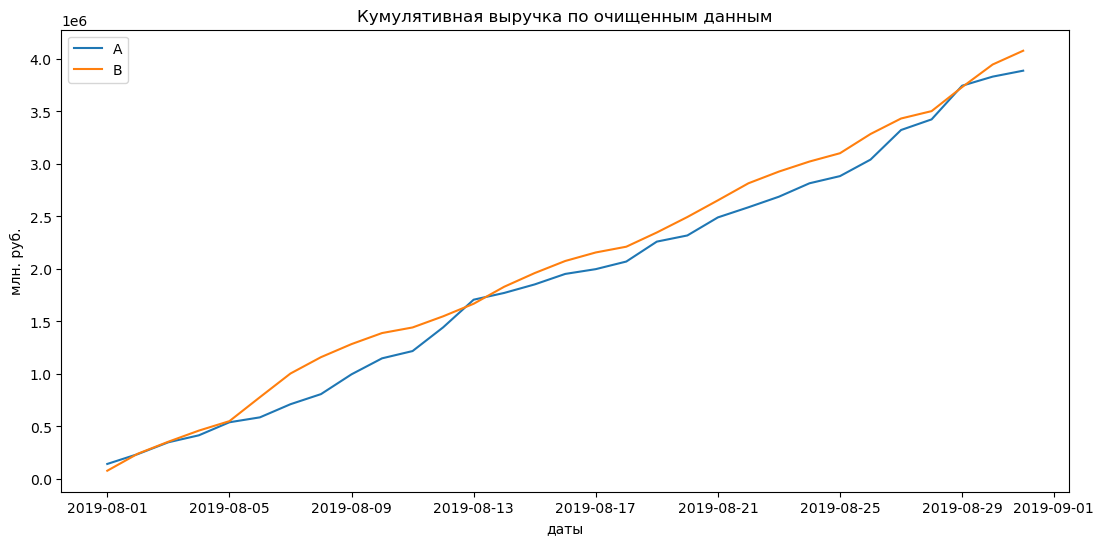

In [86]:
# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]

# зададим размеры графика
fig, ax = plt.subplots(figsize=(13, 6))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

ax.set(title = 'Кумулятивная выручка по очищенным данным', xlabel = 'даты', ylabel = 'млн. руб.')

plt.legend();

In [87]:
(orders_filtered.query('group=="B"')['revenue'].sum() / orders_filtered.query('group=="A"')['revenue'].sum() - 1) * 100

4.889212150142286

Мы видим, что кумулятивная выручка в группах близка и не прослеживается явной тенденции, что в какой-либо группе выручка растет быстрее. Выручка в группе В превышает выручку в группе А на 4,9%. 

Построим график среднего чека по кумулятивным данным по группам по очищенным данным.

### Графики среднего чека по кумулятивным данным по группам по очищенным данным

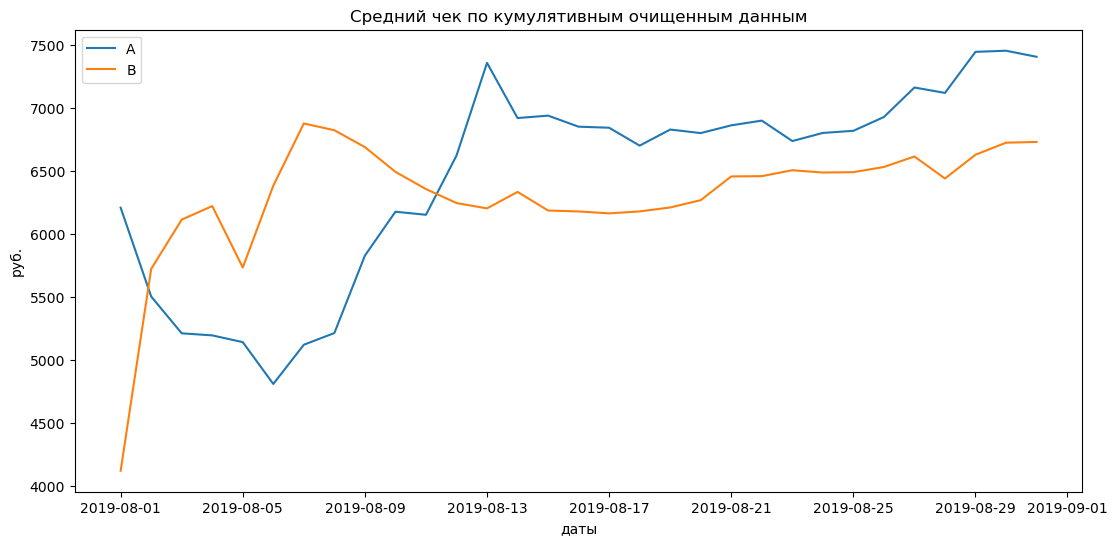

In [88]:
# Графики среднего чека по группам 
fig, ax = plt.subplots(figsize=(13, 6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

ax.set(title = 'Средний чек по кумулятивным очищенным данным', xlabel = 'даты', ylabel = 'руб.')

plt.legend();

Средний чек в группе В установился ниже, чем в группе А. Дальнейшей явно выраженной тенденции изменения среднего чека по группам не наблюдается.

Оценим статистическую значимость отличий в выручке между группами по очищенным данным.

**Нулевая гипотеза** - средние значения выручки в группах А и В равны

**Альтернативная гипотеза** - средние значения выручки в группах А и В не равны

In [89]:
# статистическая значимость отличий в выручке между группами по очищенным данным
'{0:.3f}'.format(stats.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'], 
                                   orders_filtered[orders_filtered['group']=='B']['revenue'])[1])

'0.823'

P-value существенно больше 0.05, потому нулевую гипотезу не отвергаем. Анализ «очищенных данных» показывает, что в выручке между группами нет статистически значимых различий. Учитывая, что в среднем количестве заказов между группами есть статистически значимые различия в пользу группы В, а в выручке между группами статистически значимых различий нет, целесообразно прекратить тест и признать, что группа В скорее всего лучше или как минимум не хуже группы А.

## Выводы
**Часть 1. Приоритизация гипотез**

В процессе исследования мы выполнили следующее.

Загрузили данные и выполнили базовый анализ данных. Данные  полные, пропусков нет, дубликатов нет. 


Приоритизировали гипотезы с помощью фреймворков ICE и RICE.

Приоритет гипотез по фреймворкам ICE и RICE различается. Это связано с тем, что RICE учитывает охват пользователей, а ICE - нет. Соответственно RICE больше приоритезирует гипотезы с большим охватом, так по ICE гиптеза № 8 была на 1-м месте, а по RICE она оказалась на 5-м месте.

**Часть 2. Анализ A/B-теста**

В процессе исследования мы выполнили следующее.

Загрузили данные и выполнили базовый анализ данных. Данные  полные, пропусков нет, дубликатов нет. 

Провели исследовательский анализ данных:

- Построили графики кумулятивной выручки и кумулятивного среднего чека по группам.

Кумулятивная выручка в группе В растет несколько быстрее, затем (после 17- 18 числа) кумулятивная выручка в группе В резко увеличивается, это произошло явно из-за аномального дорогого заказа. Средний чек по группе А близок к стабилизации в районе 7300 руб. Средний чек по группе В существенно выше, чем по А (но это за счет выброса), соответственно средний чек по группе В продолжает снижаться после выброса. Для более коректного анализа нужно удалить выбросы.

- Построили график относительного изменения кумулятивного среднего чека группы B к группе A. 

На графике относительного изменения кумулятивного среднего чека группы B к группе A мы также видим сильное влияние выброса. Соответственно по такому графику пока нельзя определить тенденцию. Кумулятивный средний чек группы В в какое-то время теста превышал чек группы А примерно на 50%, а в конце теста превышение составило около 30%.

- Построили график кумулятивного среднего количества заказов на покупателя по группам.

Кумулятивное среднее количество заказов на покупателя для группы В несколько ниже, чем для группы А. Однако на график влияют выбросы, это хорошо видно в начале теста.

- Построили график относительного изменения кумулятивного среднего количества заказов на покупателя группы B к группе A.

Относительное изменение кумулятивного среднего количества заказов на покупателя группы B к группе A растет со временем. Что в большей степени связано с высоким значением среднего количества заказов на покупателя в группе А в начале теста.

- Построили точечный график количества заказов по покупателям.

В основном покупатели делают 1 заказ, значительно реже - 2, более трех заказов делают единицы. Визуально 4 и более заказа можно считать выбросами.

- Посчитали 95-й и 99-й перцентили количества заказов на покупателя. Выбрали границу для определения аномальных пользователей.

Не более 5% пользователей делали более 2 заказов, и не более 1% пользователей делали более 4 заказов. Можно выбрать 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

- Построили точечный график стоимостей заказов.

На точечном графике стоимостей заказов видны два явных выброса: в районе 200 тыс. руб. и более 1,2 млн. руб. Остальные заказы относительно близки друг к другу по стоимости.

- Посчитали 95-й и 99-й перцентили стоимости заказов. Выбрали границу для определения аномальных заказов.

Не более 5% заказов выше 28 000 руб., и не более 1% заказов выше 58 233,2 руб. Выбрали стоимость заказа 100 000 руб. за верхнюю границу числа заказов, и отсеяли аномальных пользователей по ней. Визуально по точечному графику стоимостей заказов видны два явных выброса: в районе 200 тыс. руб. и более 1,2 млн. руб. Именно их и удалили.

- Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Относительный прирост среднего количества заказов группы B к группе A равен 13.8%. Проверка статистической значимости различий с помощью теста Манна-Уитни показала, что в среднем количестве заказов между группами есть статистически значимые различия. P-value составил 0,01679.

- Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Относительный прирост среднего чека заказов группы B к группе A равен 25.9%. Это существенное отличие - больше чем на четверть, но не смотря на это статистической значимости различий между группами в среднем чеке нет. Это объясняется тем, что большие отличия в среднем связаны с выбросами, а отсутствие статистической значимости - тем, что тест Манна-Уитни непараметрический и устойчив к выбросам.

- Посчитали статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Анализ "очищенных" данных показал, что в среднем количестве заказов между группами есть статистически значимые различия. Статистическая значимость различий несколько уменьшилась после "очистки" данных.

- Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Относительный прирост среднего чека заказов группы B к группе A равен - 9.1%. Средний чек заказов группы В существенно снизился после очистки данных и стал ниже среднего чека заказов группы А. Анализ "очищенных" данных показал, что в среднем чеке заказов между группами нет статистически значимых различий.

- Приняли решение по результатам теста.

Для принятия решения о результатах теста еще раз построили графики кумулятивной выручки в группах и среднего чека по очищенным данным.

Кумулятивная выручка в группах близка и не прослеживается явной тенденции, что в какой-либо группе выручка растет быстрее. Выручка в группе В превышает выручку в группе А на 4,9%.
Средний чек в группе В установился ниже, чем в группе А. Дальнейшей явно выраженной тенденции изменения среднего чека по группам не наблюдается.

- Оценили статистическую значимость отличий в выручке между группами по очищенным данным.

Анализ «очищенных данных» показал, что в выручке между группами нет статистически значимых различий, несмотря на то, что выручка в группе В на 4,9% выше, чем в группе А. Учитывая, что в среднем количестве заказов между группами есть статистически значимые различия в пользу группы В, а в выручке между группами статистически значимых различий нет, целесообразно прекратить тест и признать, что группа В скорее всего лучше или как минимум не хуже группы А.